# Ricker model
The Ricker model is a well-known ecological model with complex dynamics. It consists of a stochastic latent time series and an observation model. The latent time series can be described as a nonlinear autoregressive model:

$$ \log N^{(t)} = \log r + \log N^{(t-1)} - N^{(t-1)} + \sigma e^{(t)}$$,

where $N^{(t)}$ is the size of an animal population at time $t$ and the $e^{(t)}$ are i.i.d. standard normal error terms. The parameter $r$ acts as a growth rate and $\sigma$ is the standard deviation of the error terms. The observations $y^{(t)}$ are drawn from a Poisson distribution with mean $\varphi N^{(t)}$:

$$ y^{(t)} \sim Poisson(\varphi N^{(t)}) $$.

In total, the model has three parameters $(\log r, \sigma, \varphi)$. The model has been widely used as an example in the ABC literature after it was used by Woods (2011) in his synthetic likelihood approach.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
#from statsmodels.tsa.ar_model import AR

%matplotlib notebook

<IPython.core.display.Javascript object>


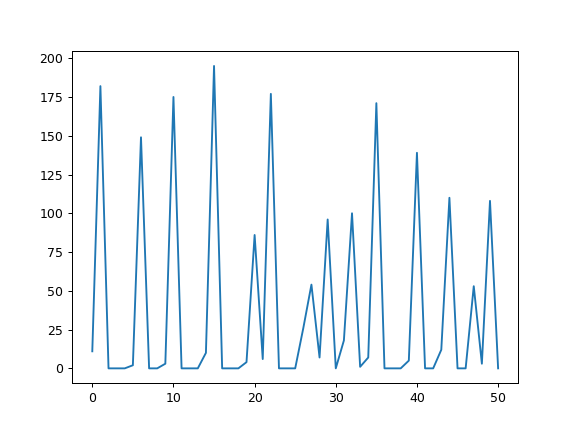

In [3]:
# simulator

def simulator(log_r, sigma, phi, n=50):
    N = [1]
    for t in range(1, n + 1):
        N_t = N[t-1] * np.exp(log_r + -N[t-1] + sigma * np.random.normal())
        N.append(N_t)
        
    N = np.array(N)
    y = np.random.poisson(phi * N)
    return y

y0 = simulator(3.8, 0.3, 10)
plt.plot(range(51), y0)

## Summary statistics
The statistics used for the Ricker model were: (i) The coefficients of the autocovariance function to lag 5. (ii) The coefficients, β1 and β2 of the autoregression y.3
t+1 = β1y.3 t + β2y.6 t , where the y.3 values were centered by
subtraction of the mean. This autoregression was suggested by exploratory data analysis, and the structure of the Ricker model. (iii) The coefficients of the cubic regression of the ordered first differences of the simulated or actual observed data on the ordered first differences of the actual observed data. These coefficients summarize the shape of the distribution of the differences in the series. (iv) The mean of the data and (v) the number of zeroes observed in the data. There are 14 statistics in all. The statistics were used in transformed form, as described in the methods section, although this makes little difference to the results.

In [4]:
# autocovariance
def autocovariance(x, k):
    n = np.size(x)
    x_mean = np.mean(x)
    auto_cov = 0
    for i in np.arange(0, n-k):
        auto_cov += ((x[i+k]) - x_mean) * (x[i] - x_mean)
    return (1/(n-1)) * auto_cov

autocovariance(y0, 5)

1316.234955786236

In [5]:
np.mean(y0)

37.450980392156865

In [6]:
np.var(y0)

3725.4632833525575

In [25]:
# autoregression
def autoregression(x):
    y_3 = x**3 - np.mean(x**3)
    y_6 = y_3**2

    y = y_3[1:]
    X = np.vstack([y_3[:-1], y_6[:-1]]).T

    beta_hat = np.linalg.lstsq(X,y)[0]
    return beta_hat

autoregression(y0)

array([ -3.62285640e-01,   3.79383293e-08])